In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_excel('house_price_dống-da.xlsx');

c:\Users\Acer Nitro5\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [4]:
df.head(1)

,title,address,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,type_of_land,street_name,ward_name,district_name,city_name,lat,long
0,Bán nhà Trần Quang Diệu mới coong đẹp 50m2x6 t...,"Đường Trần Quang Diệu, Phường Trung Liệt, Đốn...",50.0,14700.0,2021-01-01,Sổ đỏ,NaN,NaN,4.0,6.0,6.0,Bán nhà riêng\n,Đường Trần Quang Diệu,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.015698,105.824583


##### Yêu cầu vẽ biểu đồ kết hợp để
###### Phân tích mối liên hệ giữa diện tích với giá nhà. Đồng thời, giữa số phòng ngủ với giá nhà và giữa số toilet với giá nhà.
###### So sánh giá nhà trung bình trên 1 m2 giữa các hình thức nhà (type_of_land). Đồng thời thể hiện tỉ lệ % bài đăng (bản ghi) giữa các hình thức nhà (type_of_land).
###### Vẽ biểu đồ thể hiện sự thay đổi giá nhà trung bình trên 1m2 theo số lượng phòng ngủ, theo số phòng toilet hoặc theo diện tích.

In [5]:
df['Price/m2'] = np.round(df['price'] / df['area'],2)
df['type_of_land'] = df['type_of_land'].str.replace('\n ','')
df = df[df['area'] > 0]
df.head(1)

,title,address,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,type_of_land,street_name,ward_name,district_name,city_name,lat,long,Price/m2
0,Bán nhà Trần Quang Diệu mới coong đẹp 50m2x6 t...,"Đường Trần Quang Diệu, Phường Trung Liệt, Đốn...",50.0,14700.0,2021-01-01,Sổ đỏ,NaN,NaN,4.0,6.0,6.0,Bán nhà riêng,Đường Trần Quang Diệu,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.015698,105.824583,294.0


C:\Users\ACERNI~1\AppData\Local\Temp/ipykernel_17288/3674152607.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1,1].set_xticklabels(df1['type_of_land'],rotation=45)
C:\Users\ACERNI~1\AppData\Local\Temp/ipykernel_17288/3674152607.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2,1].set_xticklabels(Price_mean['bedroom'],rotation=45)
C:\Users\ACERNI~1\AppData\Local\Temp/ipykernel_17288/3674152607.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[3,0].set_xticklabels(Price_mean_toilet['toilet'],rotation=45)
C:\Users\ACERNI~1\AppData\Local\Temp/ipykernel_17288/3674152607.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[3,1].set_xticklabels(Price_mean_toilet['toilet'],rotation=45)


Text(0, 0.5, 'price')

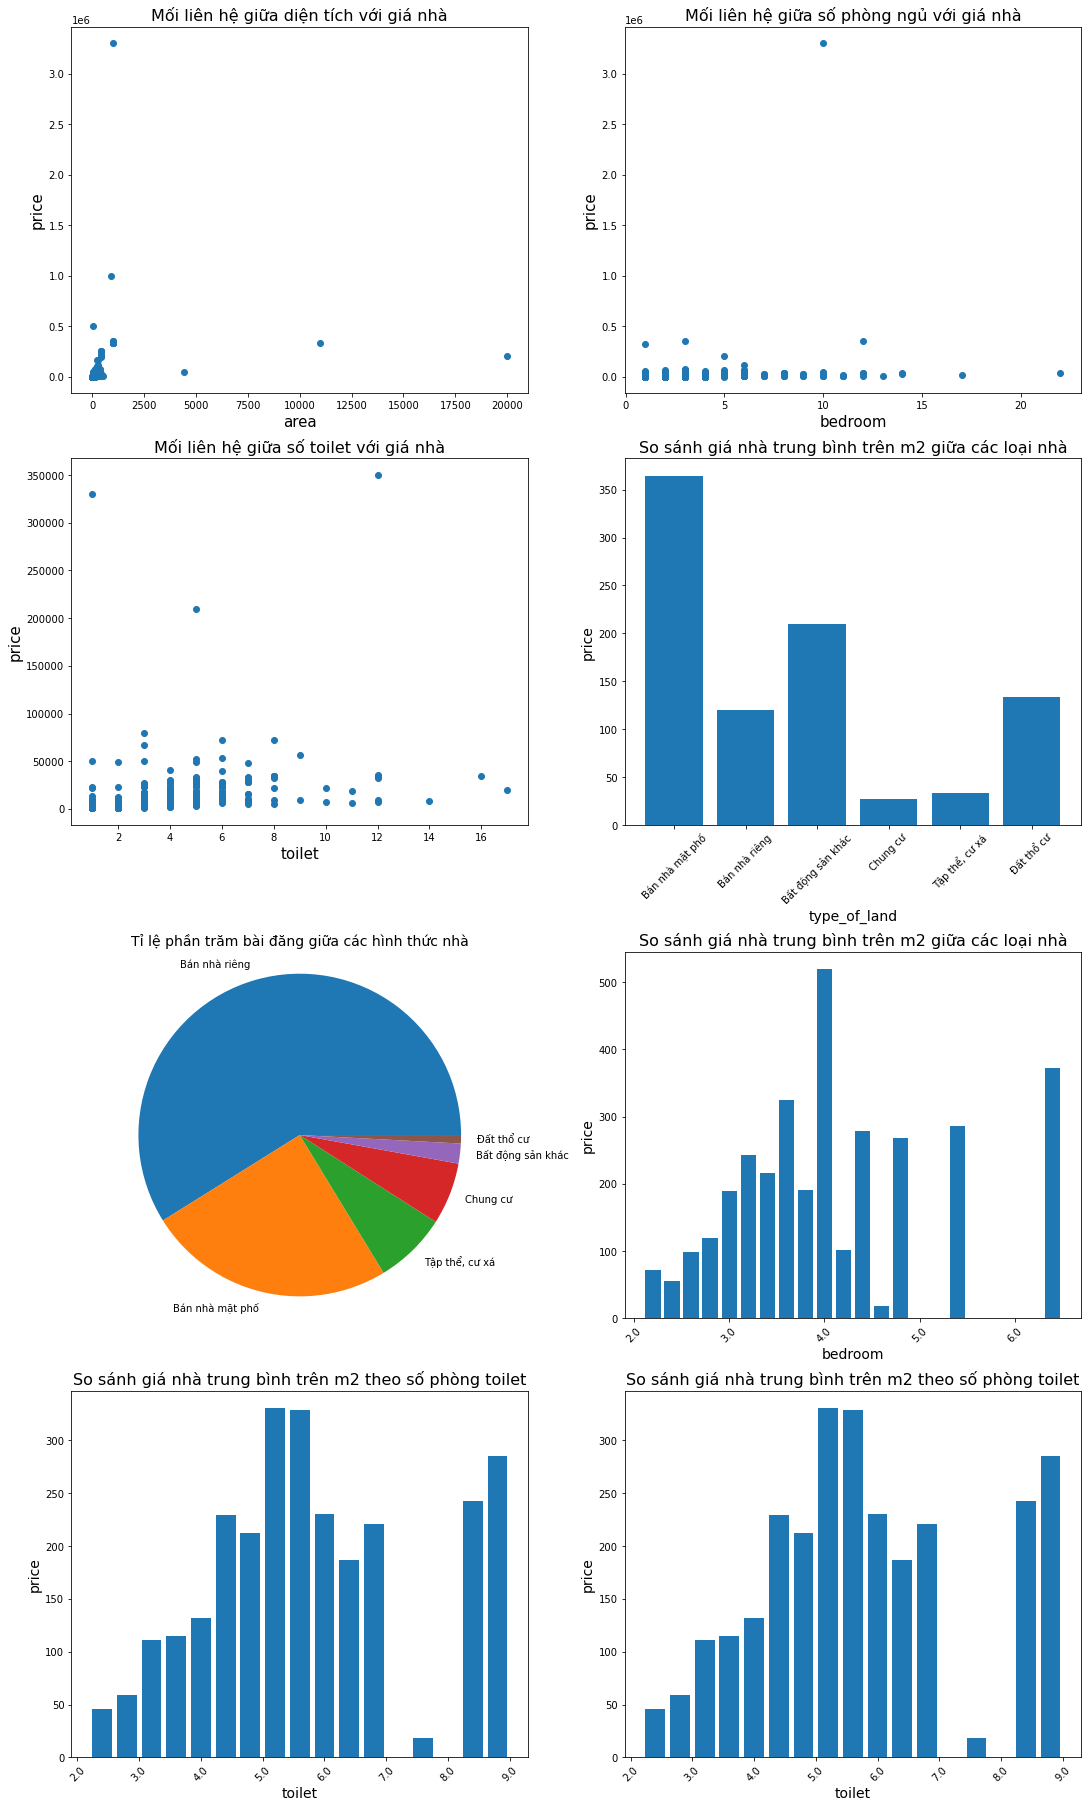

In [7]:
fig , axs = plt.subplots(4,2, figsize =(15,25),constrained_layout = True)

# Mối liên hệ giữa diện tích với giá nhà
axs[0,0].scatter(x = df['area'], y = df['price'])
axs[0,0].set_title('Mối liên hệ giữa diện tích với giá nhà', fontsize = 16)
axs[0,0].set_xlabel('area' ,fontsize = 15)
axs[0,0].set_ylabel('price',fontsize = 15)

# Mối liên hệ giữa số phòng ngủ với giá nhà
axs[0,1].scatter(x = df['bedroom'], y = df['price'])
axs[0,1].set_title('Mối liên hệ giữa số phòng ngủ với giá nhà', fontsize = 16)
axs[0,1].set_xlabel('bedroom' ,fontsize = 15)
axs[0,1].set_ylabel('price',fontsize = 15)

# Mối liên hệ giữa số toilet với giá nhà
axs[1,0].scatter(x = df['toilet'], y = df['price'])
axs[1,0].set_title('Mối liên hệ giữa số toilet với giá nhà', fontsize = 16)
axs[1,0].set_xlabel('toilet' ,fontsize = 15)
axs[1,0].set_ylabel('price',fontsize = 15)

# So sánh giá nhà trung bình trên 1 m2 giữa các hình thức nhà (type_of_land)
df1 = df.groupby('type_of_land').agg( Price = ('Price/m2','mean')).reset_index()
axs[1,1].bar(x = df1['type_of_land'], height = df1['Price'])
axs[1,1].set_title('So sánh giá nhà trung bình trên m2 giữa các loại nhà', fontsize = 16)
axs[1,1].set_xticklabels(df1['type_of_land'],rotation=45)
axs[1,1].set_xlabel('type_of_land',fontsize = 14)
axs[1,1].set_ylabel('price',fontsize = 14)

# tỉ lệ % bài đăng (bản ghi) giữa các hình thức nhà (type_of_land)
data = df['type_of_land'].value_counts()
axs[2,0].pie(x = data, labels = data.index, radius = 1.1);
axs[2,0].set_title('Tỉ lệ phần trăm bài đăng giữa các hình thức nhà', fontsize = 14)

# sự thay đổi giá nhà trung bình trên 1m2 theo số lượng phòng ngủ
Price_mean = df.groupby('bedroom')[['Price/m2']].mean().reset_index()
axs[2,1].bar(x = Price_mean['bedroom'], height = Price_mean['Price/m2'])
axs[2,1].set_title('So sánh giá nhà trung bình trên m2 giữa các loại nhà', fontsize = 16)
axs[2,1].set_xticklabels(Price_mean['bedroom'],rotation=45)
axs[2,1].set_xlabel('bedroom',fontsize = 14)
axs[2,1].set_ylabel('price',fontsize = 14)

# sự thay đổi giá nhà trung bình trên 1m2 theo số phòng toilet
Price_mean_toilet = df.groupby('toilet')[['Price/m2']].mean().reset_index()
axs[3,0].bar(x = Price_mean_toilet['toilet'], height = Price_mean_toilet['Price/m2'])
axs[3,0].set_title('So sánh giá nhà trung bình trên m2 theo số phòng toilet', fontsize = 16)
axs[3,0].set_xticklabels(Price_mean_toilet['toilet'],rotation=45)
axs[3,0].set_xlabel('toilet',fontsize = 14)
axs[3,0].set_ylabel('price',fontsize = 14)

# sự thay đổi giá nhà trung bình trên 1m2 theo diện tích
df['type_of_area'] = pd.cut(df['area'],bins=[0,100,1000,10000,20000], labels= ['Small', 'Normal', 'Large', 'Very Large'])
Price_mean_toilet = df.groupby('toilet')[['Price/m2']].mean().reset_index()
axs[3,1].bar(x = Price_mean_toilet['toilet'], height = Price_mean_toilet['Price/m2'])
axs[3,1].set_title('So sánh giá nhà trung bình trên m2 theo số phòng toilet', fontsize = 16)
axs[3,1].set_xticklabels(Price_mean_toilet['toilet'],rotation=45)
axs[3,1].set_xlabel('toilet',fontsize = 14)
axs[3,1].set_ylabel('price',fontsize = 14)